# Cryptocurrencies Analysis

In [1]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt


## Prices and daily returns

In [2]:
list = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD']

In [3]:
start = dt.datetime(2017, 12, 31)
end = dt.datetime.now()

In [4]:
df = yf.download(list, start, end)

[*********************100%***********************]  6 of 6 completed


In [5]:
prices = df['Adj Close']
prices.index = prices.index.strftime('%Y-%m-%d')

In [6]:
prices.head()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,LTC-USD,XRP-USD
Date,,,,,,
2017-12-31,0.719695,8.63558,14156.400391,756.732971,232.095993,2.30057
2018-01-01,0.728657,8.41461,13657.200195,772.640991,229.033005,2.39103
2018-01-02,0.782587,8.83777,14982.099609,884.443970,255.684006,2.48090
2018-01-03,1.079660,9.53588,15201.000000,962.719971,245.367996,3.10537
2018-01-04,1.114120,9.21399,15599.200195,980.921997,241.369995,3.19663


## Daily returns

In [7]:
# normal returns
returns = prices.pct_change()
# log returns
returns = np.log(1 + returns)

In [8]:
returns

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,LTC-USD,XRP-USD
Date,,,,,,
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.012376,-0.025921,-0.035900,0.020804,-0.013285,0.038567
2018-01-02,0.071402,0.049065,0.092589,0.135145,0.110076,0.036897
2018-01-03,0.321796,0.076027,0.014505,0.084803,-0.041183,0.224511
2018-01-04,0.031419,-0.034339,0.025858,0.018730,-0.016428,0.028964
...,...,...,...,...,...,...
2022-10-04,0.017985,0.031774,0.035702,0.028813,0.020503,0.036683
2022-10-05,-0.010362,-0.007319,-0.008698,-0.006843,-0.013090,0.019610
2022-10-06,-0.006014,-0.025841,-0.010234,-0.000834,-0.020092,0.007124


## Cumulative return

In [9]:
cum_ret = (returns + 1).cumprod() - 1
cum_ret

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,LTC-USD,XRP-USD
Date,,,,,,
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.012376,-0.025921,-0.035900,0.020804,-0.013285,0.038567
2018-01-02,0.084661,0.021872,0.053365,0.158760,0.095329,0.076888
2018-01-03,0.433701,0.099562,0.068644,0.257027,0.050220,0.318661
2018-01-04,0.478746,0.061804,0.096278,0.280572,0.032967,0.356855
...,...,...,...,...,...,...
2022-10-04,-0.974410,0.768046,-0.651678,-0.839721,-0.982212,-0.992046
2022-10-05,-0.974675,0.755105,-0.654708,-0.840818,-0.982445,-0.991890
2022-10-06,-0.974828,0.709751,-0.658242,-0.840951,-0.982798,-0.991832


<AxesSubplot:xlabel='Date'>

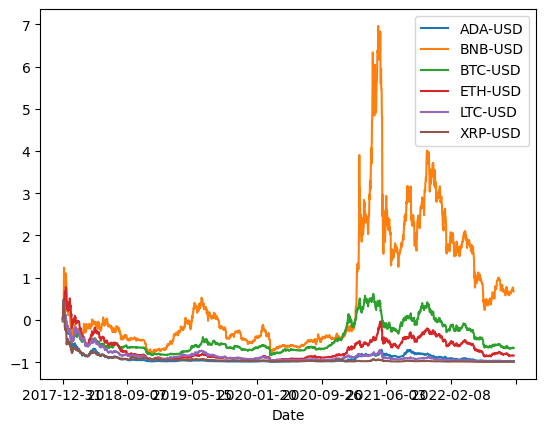

In [10]:
cum_ret.plot()

## Volatility

In [11]:
returns.std()

ADA-USD    0.059660
BNB-USD    0.057729
BTC-USD    0.039466
ETH-USD    0.051216
LTC-USD    0.053459
XRP-USD    0.060070
dtype: float64

In [12]:
#returns[returns.columns[0]]

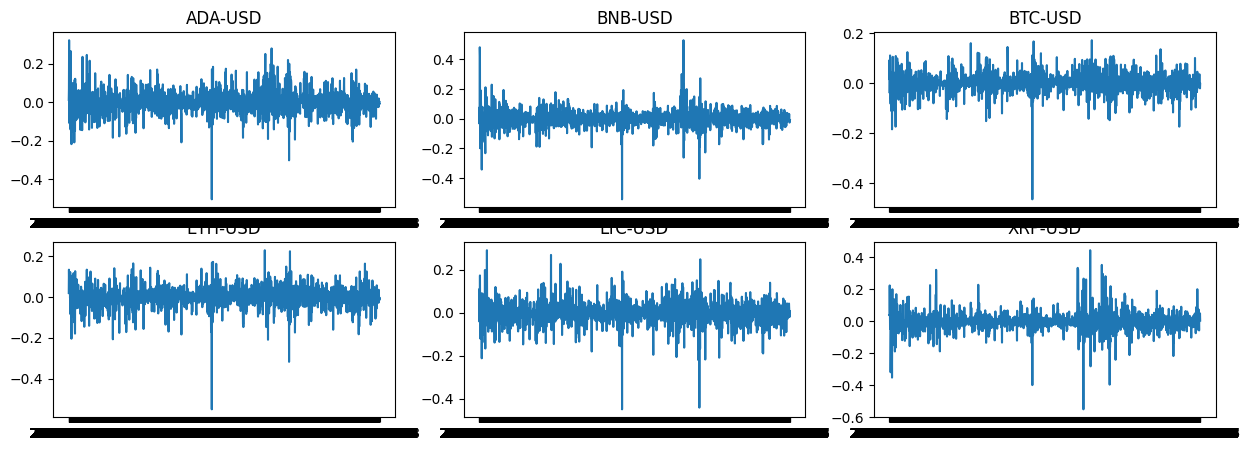

In [16]:
fig, ax = plt.subplots (2,3, figsize = (15,5))

c = 0
for i in range(2):
    for j in range(3):
        ax[i,j].plot(returns[returns.columns[c]])
        ax[i,j].set_title(returns.columns[c])
        c+=1

## Correlation

In [18]:
returns.corr()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,LTC-USD,XRP-USD
ADA-USD,1.000000,0.604451,0.709594,0.770616,0.744769,0.671647
BNB-USD,0.604451,1.000000,0.677143,0.685189,0.679357,0.558227
BTC-USD,0.709594,0.677143,1.000000,0.828188,0.810222,0.629045
ETH-USD,0.770616,0.685189,0.828188,1.000000,0.833883,0.681062
LTC-USD,0.744769,0.679357,0.810222,0.833883,1.000000,0.691860
XRP-USD,0.671647,0.558227,0.629045,0.681062,0.691860,1.000000


<AxesSubplot:>

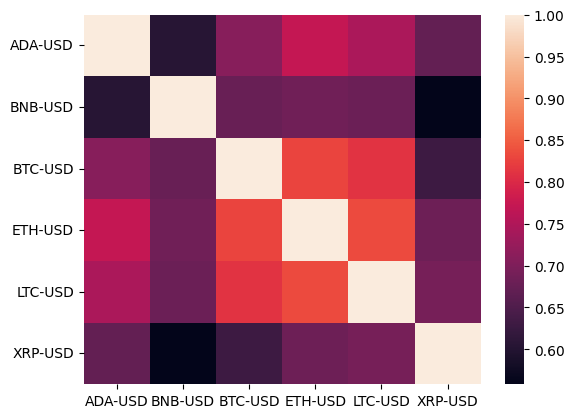

In [22]:
sns.heatmap(returns.corr())